<h1>Algoritmos voraces</h1>
<p> 
        La siguiente sección tratará los algoritmos voraces. Un algoritmo voraz construye la solución 
        en una sucesión de pasos. En cada uno de estos, tomando 
        una opción localmente óptima con la esperanza de que esto lleve a la solución global óptima. Por esto, 
        el diseño de un algoritmo voraz conlleva dos pasos importantes: la propuesta de una regla voraz y la demostración 
        formal de que tal regla, de hecho, lleva a la solución óptima global. 
</p> 

<h1>Calendarización de intervalos</h1>
<p> Comenzaremos la discusión de los algoritmos voraces con el problema de calendarización de intervalos. 
El problema es el siguiente: Tenemos un conjunto de peticiones, cada una se corresponde con un intervalo $i_i$ 
que comienza en $s_{i}$ y finaliza en $f_{i}$. Decimos que un conjunto de estas peticiones es compatible si 
    ningún  par de estas se traslapan en el tiempo. El objetivo es obtener el conjunto compatible más grande. A tal conjunto se le llamará optimo. 
</p> 
<p> Para ilustrar el concepto de compatibilidad , considera la siguiente imagen: el cuadro de la izquierda no es un conjunto compatible mientras que el de la derecha es un conjunto compatible. 
    </p> 
<img src="fig1.png"> 


<h2> Diseño del algoritmo</h2> 
<p> 
   La idea básica de el algoritmo de calendarización de intervalos es usar la regla para escoger el intervalo $i_1$. 
    Una vez que es aceptado, eliminamos los intervalos que no son compatibles con $i_1$. Ahora seleccionamos el intervalo
    $i_2$ de los intervalos restantes y eliminamos los que no son compatibles. Seguimos de esta manera hasta que ya no 
    haya más intervalos. Ahora, lo interesante es escoger una regla voraz que funcione. Hay varias reglas que podemos 
    considerar, veámos algunas y los contraejemplos que muestran porque no funcionan: 
</p> 
<ul> 
<li> 
    La regla más obvia es elegir el intervalo que empieza primero. Es decir uno de los intervalos cuyo $s(i)$ sea 
    minimo. De esta manera nuestro recurso comienza a utilizarse lo más pronto posible. Este regla no funciona ya que
    nuestro primer intervalo puede tomar mucho tiempo, lo cual podría llevar a rechazar muchos intervalos de tiempo 
    más cortos. Por ejemplo, en la imagen siguiente, si es elegido el intervalo más grande, los 4 intervalos arriba de 
    él serán rechazados y al ser estos compatibles, está regla no obtendrá el óptimo. 
    <img src = "fig2-1.png"> 
    </li> 
<li> 
    Podríamos comenzar con el intervalo que requiere menos tiempo. Es decir elegir el intervalo tal que $f(i) - s(i)$
    sea mínimo. Sin embargo esto tampoco lleva a una solución óptima. Si en la imagen siguiente es elegido primero
    el intervalo de abajo, cuyo intervalo de tiempo es el menor. Los dos intervalos de arriba serán rechazados y entonces 
    no se obtiene el óptimo. 
    <img src = "fig2-2.png"> 
    </li> 
<li> 
   Otra regla es aceptar el intervalo que tenga el menor número de intervalos no compatibles. De nuevo, esto no funciona. 
    Supogamos que elegimos el intervalo <b>(a)</b> en la siguiente imagen, ya que es el que tiene menos intervalos 
    no compatibles. Los intervalos <b>(b)</b> y <b>(c)</b> 
    tienen que ser eliminados por no ser compatibles con <b>(a)</b>. Ahora, de los intervalos restantes solo podemos
    tomar dos que sean compatibles. Lo cual resulta en un total de 3 intervalos compatibles. Sin embargo, se puede 
    ver claramente que los 4 intervalos que estan arriba de todos forman un conjunto compatible, mostrando así que la 
    regla no calcula el óptimo. 
    <img src = "fig2-3.png"> 
    </li> 
</ul> 

<p> 
    La regla voraz que lleva a la solución óptima es la siguiente: 
    Aceptamos el intervalo para el cual $f(i)$ sea lo más pequeño posible. De esta manera nos aseguramos que 
    nuestro recurso sea liberado lo más pronto posible mientras atendemos una petición. Así, se maximiza el tiempo 
    restante para atender otras peticiones. 
</p> 
<p> 
    A continuación se muestra con más detalle el algoritmo que usa esta regla. Denotaremos a $R$ como el conjunto de
    intervalos que no han sido ni aceptados ni rechazados aún y $A$ para denotar al conjunto de los intervalos rechazados. 
    </p> 
 <div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
    
&nbsp; Inicialmente $T$ es el conjunto de todos los intervalos y $A = \emptyset$ <br> 
&nbsp;&nbsp; While $R \neq \emptyset$ <br> 
&nbsp;&nbsp;&nbsp; Escoge un intervalo $i \in R$ que tenga tiempo de finalización mínimo <br> 
&nbsp;&nbsp;&nbsp; Agrega $i$ a $A$ <br> 
&nbsp;&nbsp;&nbsp; Elimina todos intervalos en $R$ que no son compatibles con $i$ <br> 
&nbsp;&nbsp; EndWhile <br> 
&nbsp; Regresar el conjunto $A$ con los intervalos aceptados <br> 
</div>


Output()

<IPython.core.display.Javascript object>


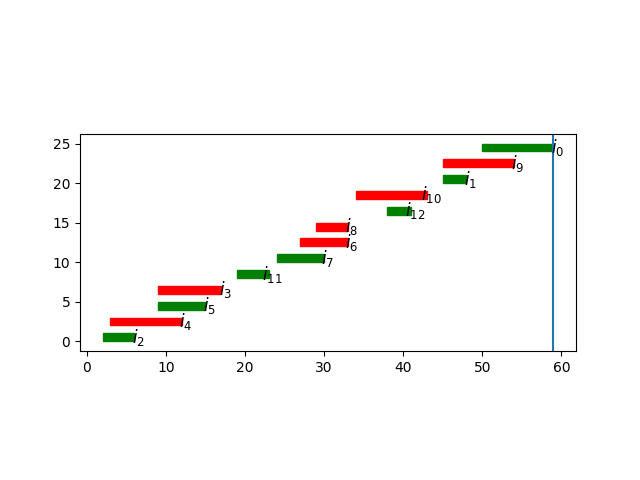

In [16]:
%run calendarizacion_alg.ipynb

<h1>Analizando el algoritmo </h1> 
<p> Aunque un algoritmo voraz sea muy sencillo, se tiene que demostrar que, de hecho, calcula la respuesta óptima.
Comencemos notando que $A$ es un conjunto compatible de intervalos. Esto es así ya que en cada paso, elegimos un intervalo y descartamos a los intervalos que no son compatibles.</p> 
<p>Ahora, tenemos que demostrar que la solución es óptima. Idealmente lo que podríamos hacer es que $A = O$ 
    ,sin embargo, hay muchos posibles conjuntos óptimos. Asi que en lugar de esto, demostraremos que $|A| =|O|$.  
    La prueba se construirá con base en la idea de que el algoritmo está siempre un paso adelante de la solución
    del algoritmo óptimo $O$. Utilizaremos la siguiente notación para la prueba:  
    sea $A = \{i_1,\dots i_k\}$ y $O = \{j_1\dots j_m\}$. Así, nuestra intención es demostrar que $j=m$. 
    

<p> Antes de demostrar que el algoritmo propuesto calcula la solución óptima, necesitamos un pequeño lema 
    que implica de manera inmediata lo que queremos. 
    Así, demostremos primero lo siguiente: </p> 
      <div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
     <p> 
      Para todos los índices $r \leq k$, $f(i_r) \leq f(j_r)$.  
          </p> 
    </div>
      
 <p> 
    Lo probaremos  con un argumento inductivo. Primero, para $r =1 $ esto es cierto pues el algoritmo selecciona $i_1$ con 
    el tiempo mínimo siempre. Ahora, sea $r > 1$, supondremos que nuestra proposición es cierta para  
    para $r - 1$ y probaremos que es cierta también para $r$. </p> 
   <p> Tenemos por hipótesis de inducción que $f(i_{r-1}) \leq f(j_{r - 1})$. Además sabemos que, dado que los 
    intervalos de $O$ son un conjunto compatible y están ordenados, $f(j_{r - 1}) \leq  s(j_r)$. Combinando estas 
    dos proposiciones, tenemos que $f(i_{r -1}) \leq s(j_r)$. 
    Es decir, el algoritmo puede elegir al intervalo $j_r$ en el paso $r$, o formalmente: $j_r \in R$. Donde $R$ es el conjunto de intervalos disponibles a elegir por el algoritmo en el paso $r$. Ya que el algoritmo 
    toma el intervalo cuyo tiempo tiempo de finalización es mínimo, tenemos que $f(i_r) \leq f(j_r)$. Con lo cual queda 
    demostrada la proposición. 
</p> 
<img src="fig3.png">
</span> 

<p> 
    Ahora, probaremos que el lema anterior implica la optimalidad de $A$. Lo haremos por contradicción. Bueno, 
    supongamos que $A$ no es un conjunto óptimo, entonces existe un conjunto óptimo $O$ debe tener más 
    intervalos, es decir, $m$ es mayor que $k$. Si aplicamos el argumento anterior para $r=k$ tenemos 
    que $f(i_k) \leq f(j_k)$. Luego hay un intervalo $j_{k+1} \in O$ dado que $m > k$. Este intervalo empieza 
    después de $f(i_k)$. Es decir, el conjunto $R$ aun contiene a $j_{k+1}$. Pero notemos que el algoritmo se detuvo 
    en el intervalo $i_k$ lo cual no puede suceder pues el algoritmo  solo se detiene cuando el conjunto $R$ está vacío.
</p> 

<h1> Implementación y tiempo de ejecución </h1> 
<p> 
    El algoritmo anterior puede ser implementado con un tiempo de ejecución $O(n\log n)$. Primero ordemos los intervalos 
    en orden crenciente de acuerdo a su tiempo de finalización. Esto toma $O(n \log n)$. Adicionalemente 
    tenemos que contruir un arreglo $S[1\dots n]$ tal que $S[i]$ tiene el valor $s(i)$ con un tiempo $O(n)$. Y para 
    finalizar el recorrido para escoger y rechazar a los intervalos con un tiempo de $O(n)$. 
 </p> 
 <p>
    El recorrido de la lo haremos así: tomamos el primer 
    intervalo e iteramos hasta que encontremos un $j$ tal que $s(j) \geq f(1)$. Tomamos este intervalo y continuamos de 
    esta manera. De forma más general, sea $f$ el tiempo de finalización del intervalo más reciente que se eligió, 
    continuamos iterando sobre los intervalos (rechazandolos) hasta encontrar una $j$ tal que $f(j)\geq f $. Este proceso 
    se realiza una sola vez con tiempo $O(n)$ como anteriormente se dijo. 
</p> 